<font color="#483D8B">
<h1  align="center">Predict the type of crime</h1>
<h2 align="center">
CSCI4511</h2>
<h3 align="center">
Qi Mao, Haowen Luo</h3>
</font>

<h4>
The URL of the data:<br>
https://catalog.data.gov/dataset/crimes-2001-to-present-398a4
</h4>

<font >
<h4 align="center">
Exploratory Data Analysis</h4>
</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('C:\CSCI4511\Crimes_-_2001_to_present.csv', index_col='Date')

In [2]:
print(df.shape)
print(list(df.columns))

(6857720, 29)
['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'Historical Wards 2003-2015', 'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes', 'Police Districts', 'Police Beats']


In [3]:
df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Date,,,,,,,,,,,,,,,,,,,,,
04/24/2019 11:59:00 PM,11667646,JC239274,079XX S GREEN ST,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,621,...,-87.645237,"(41.750019761, -87.645237392)",17.0,21554.0,70.0,487.0,31.0,59.0,20.0,229.0
04/24/2019 11:57:00 PM,11666023,JC237334,075XX S DR MARTIN LUTHER KING JR DR,5121,OTHER OFFENSE,ARSONIST: ANNUAL REGISTRATION,STREET,False,False,623,...,-87.615113,"(41.757950303, -87.615113401)",31.0,21546.0,67.0,496.0,32.0,61.0,20.0,227.0
04/24/2019 11:55:00 PM,11666007,JC237309,016XX S AVERS AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,True,1014,...,-87.721182,"(41.858072085, -87.721182424)",36.0,21569.0,30.0,752.0,14.0,57.0,21.0,156.0
04/24/2019 11:53:00 PM,11666631,JC238179,039XX W DIVISION ST,0860,THEFT,RETAIL THEFT,GAS STATION,False,False,2535,...,-87.725602,"(41.902678618, -87.725601735)",41.0,4299.0,24.0,456.0,45.0,5.0,16.0,66.0
04/24/2019 11:51:00 PM,11666042,JC237300,002XX W 109TH PL,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,True,513,...,-87.628792,"(41.695250549, -87.628791598)",45.0,21861.0,45.0,524.0,22.0,19.0,10.0,260.0


<h4>Top 11 crime type</h4>

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
crimes=df.loc['2018':,:]

In [6]:
crimes.shape

(6518297, 29)

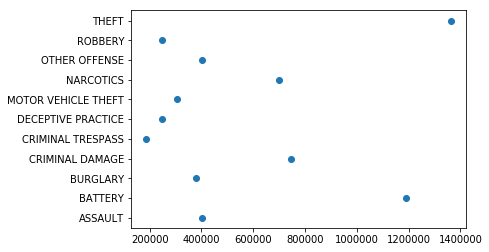

In [7]:
crimetype_count = pd.DataFrame(crimes[['Primary Type']].groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())
plt.scatter(crimetype_count['counts'][:11],crimetype_count['Primary Type'][:11])
plt.show()

We can see that from 2001 to 2018 the main types of crime are theft and battery

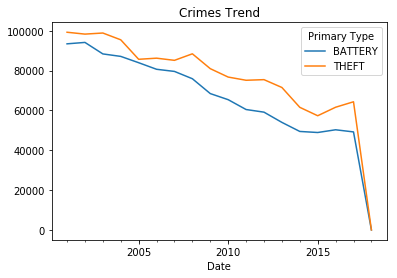

In [8]:
Trend=pd.DataFrame(crimes[crimes['Primary Type'].isin(['THEFT','BATTERY'])]['Primary Type'])
(Trend.groupby([pd.Grouper(freq='A'), 'Primary Type']))['Primary Type'].count().unstack().plot()
plt.title("Crimes Trend")
plt.show()

<font >
<h4 align="center">
Clean up the data and Models</h4>
</font>

In this section, I explore the connection of the location factor to the type of crime. So I chose to leave three factors of longitude, latitude and location.

First throw away other crime type and extremely rare locations

In [9]:
crimes = pd.read_csv('C:\CSCI4511\Crimes_-_2001_to_present.csv',error_bad_lines=False)
types=crimes.groupby('Primary Type')['Primary Type'].count()
types.sort_values(ascending=False, inplace=True)
clist=types.index.values[0:2].tolist()
crimes=crimes[crimes["Primary Type"].isin(clist)]

types=crimes.groupby('Location Description')['Location Description'].count()
types.sort_values(ascending=False, inplace=True)
clist=types.index.values[0:30].tolist()
crimes=crimes[crimes['Location Description'].isin(clist)]


make a new column named Theft. give theft an indicator variable 1 and give battery an indicator variable 0

In [10]:
theft=['THEFT']
crimes['Theft']=np.where(crimes['Primary Type'].isin(theft), 1, 0)

drop other column, only leave Theft, Latitude, Longitude, and Location Description.

In [11]:
crimes = crimes[[ 'Theft', 'Location Description', 'Latitude','Longitude']]
crimes.head()

,Theft,Location Description,Latitude,Longitude
0,1,RESIDENTIAL YARD (FRONT/BACK),41.750020,-87.645237
2,1,APARTMENT,41.858072,-87.721182
3,1,GAS STATION,41.902679,-87.725602
7,0,SIDEWALK,41.903723,-87.709998
8,1,APARTMENT,41.913810,-87.782344


I use the get_dummies method to to convert the location data into dummy variable. and drop the NA data.

In [12]:
crimes.groupby('Theft').count()

,Location Description,Latitude,Longitude
Theft,,,
0,1211112,1205758,1205758
1,1340394,1325789,1325789


<h4>Baseline model</h4>

In [13]:
positive=crimes[crimes['Theft'] == 1 ]
negative=crimes[crimes['Theft'] == 0 ]
print(float(len(positive))/len(crimes))
print(float(len(negative))/len(crimes))

0.5253344495368618
0.47466555046313824


In [14]:
crimes=crimes.dropna()

In [15]:
crimes=crimes[crimes["Location Description"]!="OTHER"]
crimes=pd.get_dummies(crimes,columns=["Location Description"])
crimes=crimes[pd.isna(crimes["Latitude"])==False]

In [16]:
crimes.head()

,Theft,Latitude,Longitude,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_CHA APARTMENT,Location Description_CHA PARKING LOT/GROUNDS,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CTA BUS,...,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING","Location Description_SCHOOL, PUBLIC, GROUNDS",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_TAVERN/LIQUOR STORE,Location Description_VEHICLE NON-COMMERCIAL
0,1,41.750020,-87.645237,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,41.858072,-87.721182,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,41.902679,-87.725602,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,41.903723,-87.709998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1,41.913810,-87.782344,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split the train and test data.

In [17]:
train=crimes.sample(frac=0.7,random_state=200)
test=crimes.drop(train.index)
x_train = train.iloc[:,1:34]
y_train = train['Theft']

x_test = test.iloc[:,1:34]
y_test = test['Theft']

In [18]:
positive=y_test[y_test == 1 ]
negative=y_test[y_test == 0 ]
print(float(len(positive))/len(y_test))
print(float(len(negative))/len(y_test))

0.5124422518048245
0.4875577481951755


In [19]:
accuracy_dict={}

<h4>Model 1: Random forest</h4>

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf=rf.fit(x_train, y_train)
accuracy_dict['Random Forest']=rf.score(x_test, y_test)
print(' mean accuracy: %.2f' % rf.score(x_test, y_test))

 mean accuracy: 0.73


the feature importances

In [21]:
list(zip(x_test, rf.feature_importances_))

[('Latitude', 0.38127639810475056),
 ('Longitude', 0.321697634838097),
 ('Location Description_ALLEY', 0.004632263616299736),
 ('Location Description_APARTMENT', 0.06363255467620624),
 ('Location Description_BAR OR TAVERN', 0.0016974858378496712),
 ('Location Description_CHA APARTMENT', 0.005300787707455181),
 ('Location Description_CHA PARKING LOT/GROUNDS', 0.003943561577600833),
 ('Location Description_COMMERCIAL / BUSINESS OFFICE', 0.0038698410309401256),
 ('Location Description_CTA BUS', 0.000524145887139672),
 ('Location Description_CTA PLATFORM', 0.0003266041235288053),
 ('Location Description_CTA TRAIN', 0.0018513571156917607),
 ('Location Description_DEPARTMENT STORE', 0.026646249912929066),
 ('Location Description_DRUG STORE', 0.007582295891639853),
 ('Location Description_GAS STATION', 0.001990250465134697),
 ('Location Description_GROCERY FOOD STORE', 0.01518444347958682),
 ('Location Description_HOSPITAL BUILDING/GROUNDS', 0.0004873703682871331),
 ('Location Description_HOT

confusion matrix

In [22]:
preds = rf.predict(x_test)
print('\n0 is BATTERY and 1 is theft\n\n')
print(pd.crosstab(y_test, preds, rownames=['Actual '], colnames=['Predicted ']))


0 is BATTERY and 1 is theft


Predicted        0       1
Actual                    
0           263206   91287
1           108219  264367


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.71      0.74      0.73    354493
          1       0.74      0.71      0.73    372586

avg / total       0.73      0.73      0.73    727079



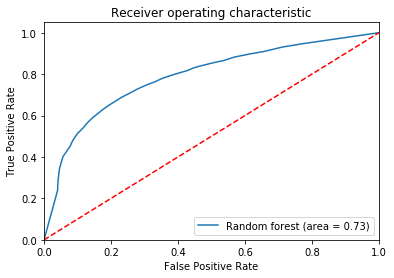

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
random_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
random_fpr, random_tpr, random_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(random_fpr, random_tpr, label='Random forest (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h4>Model 2: Logistic regression</h4>

In [25]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy_dict['Logistic regression']=lr.score(x_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [26]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.725


The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well.

confusion matrix

In [27]:
print('\n0 is BATTERY and 1 is theft\n\n')
print(pd.crosstab(y_test, y_pred, rownames=['Actual '], colnames=['Predicted ']))


0 is BATTERY and 1 is theft


Predicted        0       1
Actual                    
0           253738  100755
1            98974  273612


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.72      0.72      0.72    354493
          1       0.73      0.73      0.73    372586

avg / total       0.73      0.73      0.73    727079



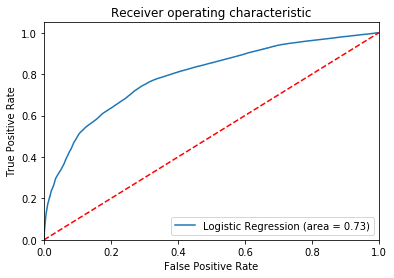

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
logit_fpr, logit_tpr, logit_thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(logit_fpr, logit_tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h4>Model 3: Naïve Bayes</h4>

In [30]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf=clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_p=clf.predict_proba(x_test)
accuracy_dict['Naive Bayes']=clf.score(x_test, y_test)
print('Accuracy of Naïve Bayes classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of Naïve Bayes classifier on test set: 0.65


confusion matrix

In [31]:
clf = clf.predict(x_test)
print('\n0 is BATTERY and 1 is theft\n\n')
print(pd.crosstab(y_test, pred, rownames=['Actual '], colnames=['Predicted ']))


0 is BATTERY and 1 is theft


Predicted        0       1
Actual                    
0           324450   30043
1           224831  147755


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.59      0.92      0.72    354493
          1       0.83      0.40      0.54    372586

avg / total       0.71      0.65      0.63    727079



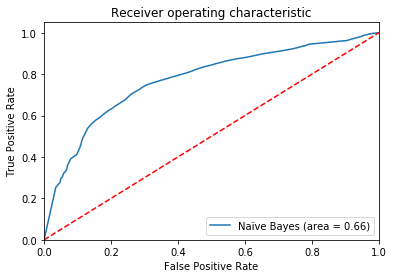

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
GaussianNB_roc_auc = roc_auc_score(y_test, pred)
GaussianNB_fpr, GaussianNB_tpr, GaussianNB_thresholds = roc_curve(y_test, pred_p[:,1])
plt.figure()
plt.plot(GaussianNB_fpr, GaussianNB_tpr, label='Naïve Bayes (area = %0.2f)' % GaussianNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h4>Model 4: Decision Tree</h4>

In [34]:
from sklearn import tree
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(x_train, y_train)
pred = treeclf.predict(x_test)
pred_p=treeclf.predict_proba(x_test)
accuracy_dict['Decision Tree']=treeclf.score(x_test, y_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(treeclf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.72


In [35]:
treeclf = treeclf.predict(x_test)
print('\n0 is BATTERY and 1 is theft\n\n')
print(pd.crosstab(y_test, pred, rownames=['Actual '], colnames=['Predicted ']))


0 is BATTERY and 1 is theft


Predicted        0       1
Actual                    
0           268375   86118
1           117972  254614


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.69      0.76      0.72    354493
          1       0.75      0.68      0.71    372586

avg / total       0.72      0.72      0.72    727079



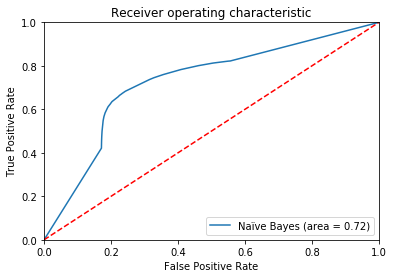

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tree_roc_auc = roc_auc_score(y_test, pred)
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test, pred_p[:,1])
plt.figure()
plt.plot(tree_fpr, tree_tpr, label='Naïve Bayes (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<font >
<h4 align="center">
Conclusions</h4>
</font>

<h4>ROC for all three models</h4>

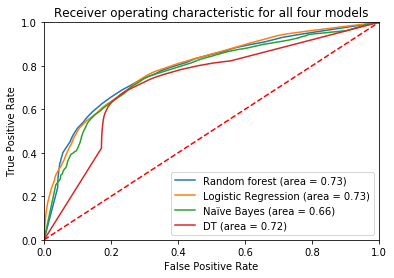

In [38]:
plt.figure()
plt.plot(random_fpr, random_tpr, label='Random forest (area = %0.2f)' % random_roc_auc)
plt.plot(logit_fpr, logit_tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(GaussianNB_fpr, GaussianNB_tpr, label='Naïve Bayes (area = %0.2f)' % GaussianNB_roc_auc)
plt.plot(tree_fpr, tree_tpr, label='DT (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for all four models')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

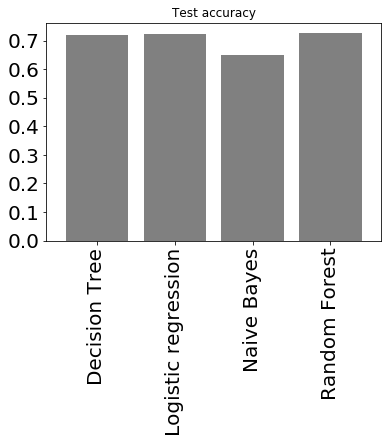

In [39]:
pd.Series(accuracy_dict).plot(kind="bar",title="Test accuracy",width=0.8,color="grey", fontsize=20)